In [56]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne
import funcs4anal as fa

## Load data

In [57]:
# load raw
subject_id = 10
session = 1 # 1: before, 2: after
sessions = ['before', 'after']
before_or_after = sessions[session-1]
eeg_path = os.path.join('..', '..', '..','data', str(subject_id), 'repaired_' + before_or_after + '.fif')
eeg = mne.io.read_raw_fif(eeg_path, preload=True, verbose=False)
# raw.plot()
print(eeg.info['subject_info'],eeg.info['experimenter'])

{'id': 10} before


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_25424\3071393021.py:7: RuntimeWarning: This filename (..\..\..\data\10\repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(eeg_path, preload=True, verbose=False)


### Make events

120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
113 events found
Event IDs: [1]


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_25424\803054998.py:19: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=eeg.info['sfreq'],


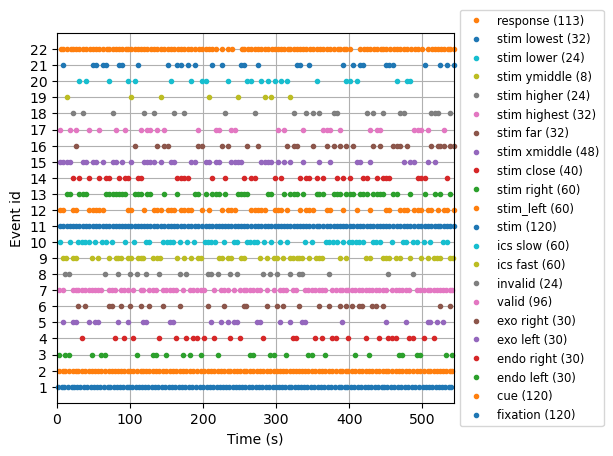

In [58]:
# Extract channel names and types
ch_names = eeg.info['ch_names']
ch_types = ['misc'] + ['eeg'] * 32 + ['misc'] + ['stim'] * 22

# Detect events
stim_channel_names = [ch_name for ch_name, ch_type in zip(ch_names, ch_types) if ch_type == 'stim']
events = np.array([], dtype=int).reshape(0, 3)  # Create an empty events array with 3 columns

for idx, stim_channel_name in enumerate(stim_channel_names):
    single_event = mne.find_events(eeg, stim_channel=stim_channel_name, min_duration=1/eeg.info['sfreq'])

    # Update the event id in single_event (the third column) to be idx + 1
    single_event[:, 2] = idx + 1

    # Concatenate single_event to the events array
    events = np.vstack([events, single_event])

event_dict = {stim_channel_name: idx + 1 for idx, stim_channel_name in enumerate(stim_channel_names)}
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=eeg.info['sfreq'],
                          first_samp=eeg.first_samp)


### Define new events

In [59]:
# Get the indices that would sort the first column
sort_indices = np.argsort(events[:, 0])

# Use these indices to sort the entire array
sorted_events = events[sort_indices]

pieces = []
piece = []
for event in sorted_events:
    if event[2] == 1 and piece:  # Found a 1 in the third column and there are events in current piece
        pieces.append(np.array(piece))  # Save the current piece as a numpy array
        piece = []  # Create a new piece
    piece.append(event)  # Add the current event to the piece

# Add the last piece if it's not empty
if piece:
    pieces.append(np.array(piece))

# the_pieces = [piece for piece in pieces if any((piece[:, 2] == 3) | (piece[:, 2] == 4)) and any(piece[:, 2] == 7)]
the_pieces = fa.extract_events("(3 or 4) and 7")
len(the_pieces)

fig = mne.viz.plot_events(the_pieces, event_id=event_dict, sfreq=eeg.info['sfreq'],
                          first_samp=eeg.first_samp)


AttributeError: module 'funcs4anal' has no attribute 'extract_events'

In [ ]:
event_dict

{'fixation': 1,
 'cue': 2,
 'endo left': 3,
 'endo right': 4,
 'exo left': 5,
 'exo right': 6,
 'valid': 7,
 'invalid': 8,
 'ics fast': 9,
 'ics slow': 10,
 'stim': 11,
 'stim_left': 12,
 'stim right': 13,
 'stim close': 14,
 'stim xmiddle': 15,
 'stim far': 16,
 'stim highest': 17,
 'stim higher': 18,
 'stim ymiddle': 19,
 'stim lower': 20,
 'stim lowest': 21,
 'response': 22,
 'AND_7_22': 23,
 'OR_3_4': 24}

In [ ]:
# Create epochs with the interested events

epochs = mne.Epochs(eeg, events, event_id=event_dict['endo left'], tmin = 0, tmax=1, baseline=(0,0), preload=True)
# epochs.compute_psd(method='multitaper',fmin=0.1, fmax=50).plot(average=True)
# epochs.plot_psd(fmin=0.1, fmax=50, average=True)

# Plot the epochs
# epochs.plot_image(picks=['Cz', 'P6'])

Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 1201 original time points ...
0 bad epochs dropped


Not setting metadata
120 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 6097 original time points ...
1 bad epochs dropped
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


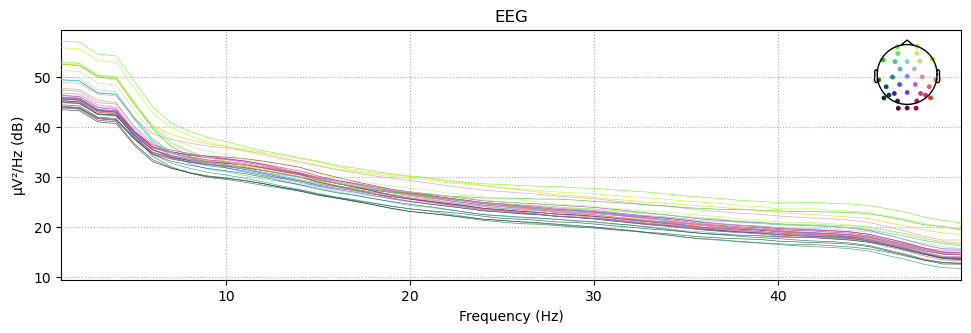

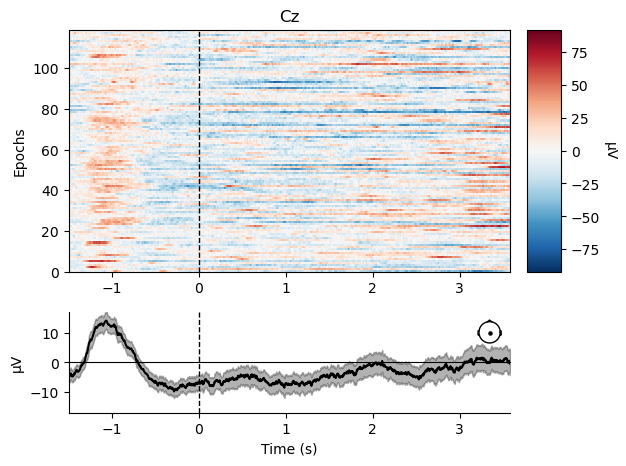

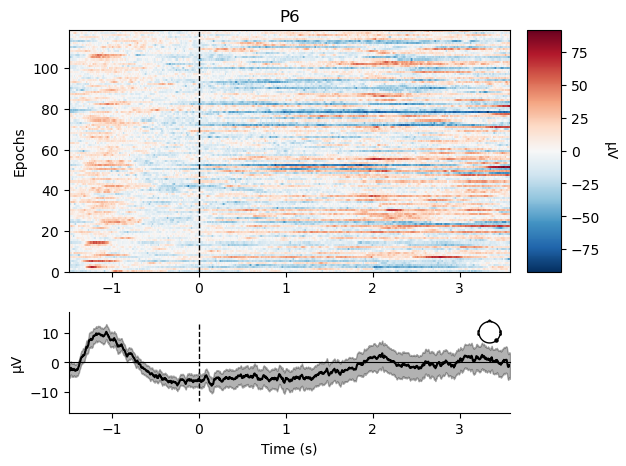

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [ ]:
# Create epochs with the interested events
epochs = mne.Epochs(eeg, events, event_id=1, tmin=-1.5, tmax=3.58, preload=True)


# Plot the epochs
epochs.plot_image(picks=['Cz', 'P6'])

Not setting metadata
48 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 481 original time points ...
0 bad epochs dropped
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated


/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29997/2850414596.py:16: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, intersected_events, event_id={'picked_events': 8}, tmin=-0.1, tmax=0.3, preload=True)


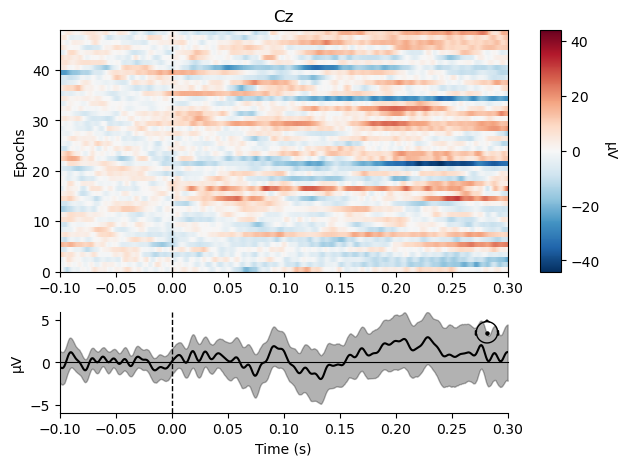

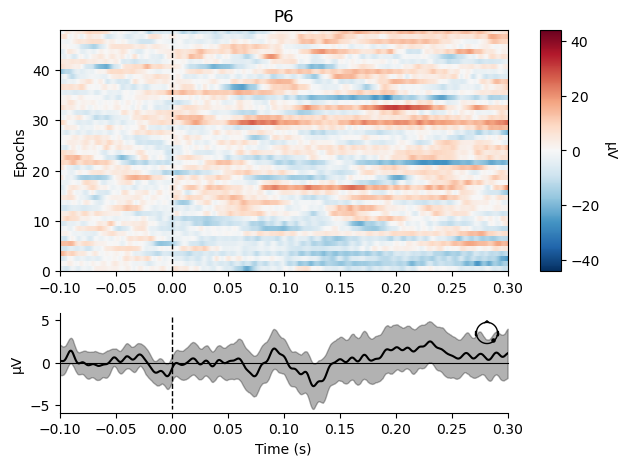

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [ ]:
# Create separate events arrays for events to merge (2 and 3) and the event to intersect with (6)
events_to_merge = events[np.isin(events[:, 2], [2, 3])]
event_to_intersect = events[events[:, 2] == 6]

# Merge events 2 and 3 by changing their event ids to a new id (e.g., 8)
merged_events = events_to_merge.copy()
merged_events[:, 2] = 8

# Find the intersection between the merged events and event 6
intersection_samples = np.intersect1d(merged_events[:, 0], event_to_intersect[:, 0])

# Create a new events array with the intersected events
intersected_events = merged_events[np.isin(merged_events[:, 0], intersection_samples)]

# Create epochs with the intersected events
epochs = mne.Epochs(eeg, intersected_events, event_id={'picked_events': 8}, tmin=-0.1, tmax=0.3, preload=True)

# Plot the epochs
epochs.plot_image(picks=['Cz', 'P6'])